# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = html_soup.find('table', class_="table")

In [6]:
mars_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [7]:
type(mars_table)

bs4.element.Tag

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_data_list = []

# Loop through the scraped data to create a list of rows
rows = mars_table.find_all('tr', class_='data-row')
for row in rows:
    id = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    
    mars_data_list.append({
        'ID': id,
        'Terrestrial Date': terrestrial_date,
        'Sol': sol,
        'ls': ls,
        'Month': month,
        'Min Temp': min_temp,
        'Pressure': pressure
    })
    
print(mars_data_list)

[{'ID': '2', 'Terrestrial Date': '2012-08-16', 'Sol': '10', 'ls': '155', 'Month': '6', 'Min Temp': '-75.0', 'Pressure': '739.0'}, {'ID': '13', 'Terrestrial Date': '2012-08-17', 'Sol': '11', 'ls': '156', 'Month': '6', 'Min Temp': '-76.0', 'Pressure': '740.0'}, {'ID': '24', 'Terrestrial Date': '2012-08-18', 'Sol': '12', 'ls': '156', 'Month': '6', 'Min Temp': '-76.0', 'Pressure': '741.0'}, {'ID': '35', 'Terrestrial Date': '2012-08-19', 'Sol': '13', 'ls': '157', 'Month': '6', 'Min Temp': '-74.0', 'Pressure': '732.0'}, {'ID': '46', 'Terrestrial Date': '2012-08-20', 'Sol': '14', 'ls': '157', 'Month': '6', 'Min Temp': '-74.0', 'Pressure': '740.0'}, {'ID': '57', 'Terrestrial Date': '2012-08-21', 'Sol': '15', 'ls': '158', 'Month': '6', 'Min Temp': '-78.0', 'Pressure': '740.0'}, {'ID': '68', 'Terrestrial Date': '2012-08-22', 'Sol': '16', 'ls': '158', 'Month': '6', 'Min Temp': '-77.0', 'Pressure': '740.0'}, {'ID': '79', 'Terrestrial Date': '2012-08-23', 'Sol': '17', 'ls': '159', 'Month': '6', 'Mi

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_data_df = pd.DataFrame(mars_data_list)


In [10]:
# Confirm DataFrame was created successfully
mars_data_df.head()

,ID,Terrestrial Date,Sol,ls,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_data_df.dtypes

ID                  object
Terrestrial Date    object
Sol                 object
ls                  object
Month               object
Min Temp            object
Pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_data_df = mars_data_df.astype({
        'Sol': 'int64',
        'ls': 'int64',
        'Month': 'int64',
        'Min Temp': float,
        'Pressure': float
})
    

In [13]:
mars_data_df['Terrestrial Date']= mars_data_df['Terrestrial Date'].apply(pd.to_datetime)

In [14]:
# Confirm type changes were successful by examining data types again
mars_data_df.dtypes

ID                          object
Terrestrial Date    datetime64[ns]
Sol                          int64
ls                           int64
Month                        int64
Min Temp                   float64
Pressure                   float64
dtype: object

In [15]:
mars_data_df.head()

,ID,Terrestrial Date,Sol,ls,Month,Min Temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
mars_data_df.describe()

,Sol,ls,Month,Min Temp,Pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,565.342298,105.599153,3.506493,5.504098,54.253226
min,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1977.000000,359.000000,12.000000,-62.000000,925.000000


## 1. How many months exist on Mars?

In [17]:
mars_months = mars_data_df["Month"].max()
mars_months

12

In [18]:
# 1. How many months are there on Mars?
mars_data_df.groupby("Month").max()

# there are twelve months on mars

,ID,Terrestrial Date,Sol,ls,Min Temp,Pressure
Month,,,,,,
1,999,2017-07-07,1748,29,-62.0,888.0
2,479,2017-09-12,1814,59,-76.0,908.0
3,486,2017-11-19,1880,89,-77.0,907.0
4,551,2018-01-25,1945,119,-77.0,857.0
5,610,2018-02-27,1977,149,-74.0,777.0
6,79,2016-07-02,1388,179,-71.0,764.0
7,714,2016-08-24,1440,209,-65.0,836.0
8,9,2016-10-11,1487,239,-63.0,914.0
9,99,2016-11-28,1533,269,-63.0,925.0


## 2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [19]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_data_df["Sol"].count()
martian_days
# there are 1867 Martian days worth of data in this dataset. 

1867

## 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? 

In [20]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_data_df.groupby("Month").mean()
avg_low_temp

,Sol,ls,Min Temp,Pressure
Month,,,,
1,1077.574713,15.281609,-77.160920,862.488506
2,1175.853933,44.258427,-79.932584,889.455056
3,1204.406250,75.010417,-83.307292,877.322917
4,1244.500000,104.365979,-82.747423,806.329897
5,1182.691275,132.885906,-79.308725,748.557047
6,750.829932,164.897959,-75.299320,745.054422
7,715.105634,194.894366,-72.281690,795.105634
8,795.333333,224.347518,-68.382979,873.829787
9,861.186567,254.052239,-69.171642,913.305970


In [21]:
print(avg_low_temp[["Min Temp"]])

        Min Temp
Month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807


In [22]:
monthly_avg_low_temp = avg_low_temp.loc[:, ["Min Temp"]]
monthly_avg_low_temp

,Min Temp
Month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


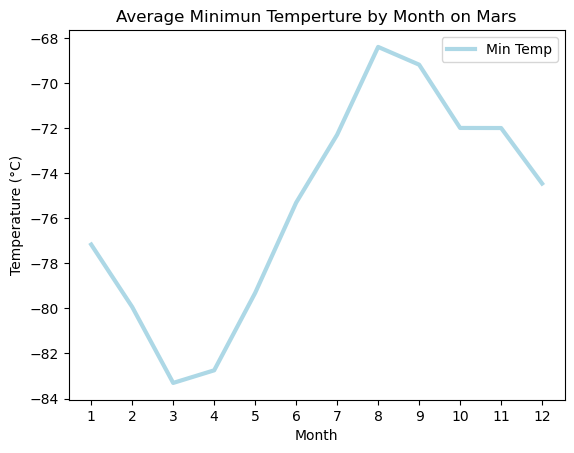

In [23]:
# Plot the average temperature by month

monthly_avg_low_temp_graph = monthly_avg_low_temp.plot(kind="line", color="lightblue", linewidth=3,)

monthly_avg_low_temp_graph.set_title("Average Minimun Temperture by Month on Mars")
monthly_avg_low_temp_graph.set_ylabel("Temperature (°C)")
monthly_avg_low_temp_graph.set_xticks(range(1,13))

plt.savefig('./avg_temp_line.png')

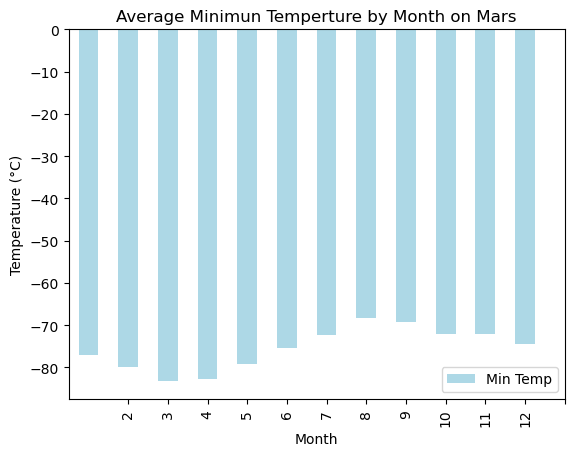

In [24]:
monthly_avg_low_temp_graph = monthly_avg_low_temp.plot(kind="bar", color="lightblue")

monthly_avg_low_temp_graph.set_title("Average Minimun Temperture by Month on Mars")
monthly_avg_low_temp_graph.set_ylabel("Temperature (°C)")
monthly_avg_low_temp_graph.set_xticks(range(1,13))

plt.savefig('./avg_temp_bar.png')

In [25]:
# Identify the coldest and hottest months in Curiosity's location
high_low_temp = monthly_avg_low_temp.sort_values("Min Temp")

# Third month is coldest
# Eigth month is the warmest
# All of which are very cold by 'human' standards.

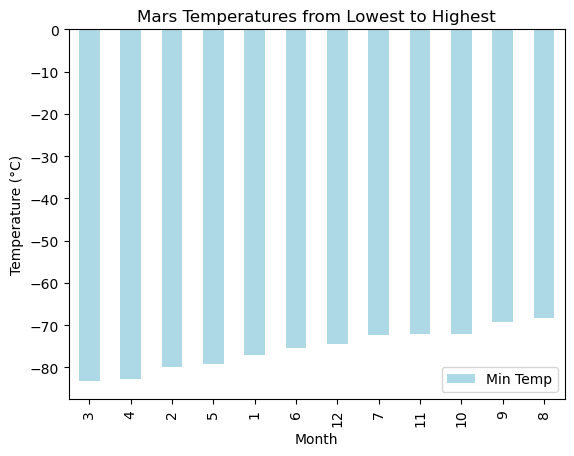

In [26]:
high_low_temp_graph = high_low_temp.plot(kind="bar", color="lightblue")

high_low_temp_graph.set_title("Mars Temperatures from Lowest to Highest")
high_low_temp_graph.set_ylabel("Temperature (°C)")

plt.savefig('./low_high_temp_bar.png')

## 4. Which months have the lowest and the highest atmospheric pressure on Mars? 

In [27]:
# 4. Average pressure by Martian month
monthly_avg_pres = mars_data_df.groupby("Month").mean()
monthly_avg_pres

,Sol,ls,Min Temp,Pressure
Month,,,,
1,1077.574713,15.281609,-77.160920,862.488506
2,1175.853933,44.258427,-79.932584,889.455056
3,1204.406250,75.010417,-83.307292,877.322917
4,1244.500000,104.365979,-82.747423,806.329897
5,1182.691275,132.885906,-79.308725,748.557047
6,750.829932,164.897959,-75.299320,745.054422
7,715.105634,194.894366,-72.281690,795.105634
8,795.333333,224.347518,-68.382979,873.829787
9,861.186567,254.052239,-69.171642,913.305970


In [28]:
monthly_avg_pres = round(monthly_avg_pres.loc[:, ["Pressure"]], 2)
monthly_avg_pres

# The average pressure by Martian month is shown in output. 

,Pressure
Month,
1,862.49
2,889.46
3,877.32
4,806.33
5,748.56
6,745.05
7,795.11
8,873.83
9,913.31


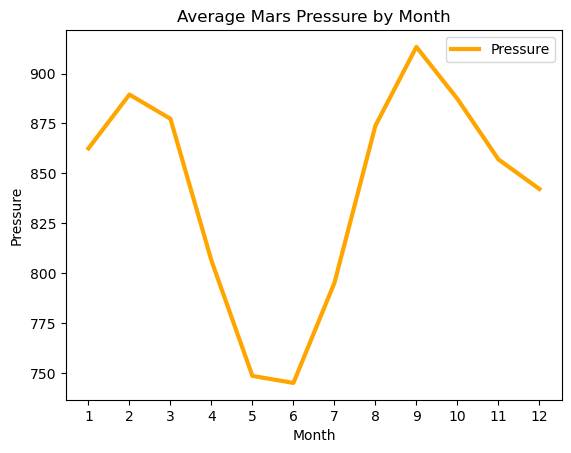

In [29]:
# Plot the average pressure by month
monthly_avg_pres_graph = monthly_avg_pres.plot(kind="line", color="orange", linewidth=3)

monthly_avg_pres_graph.set_title("Average Mars Pressure by Month")
monthly_avg_pres_graph.set_ylabel("Pressure")
monthly_avg_pres_graph.set_xticks(range(1,13))

plt.savefig('./avg_pressure_month_line.png')

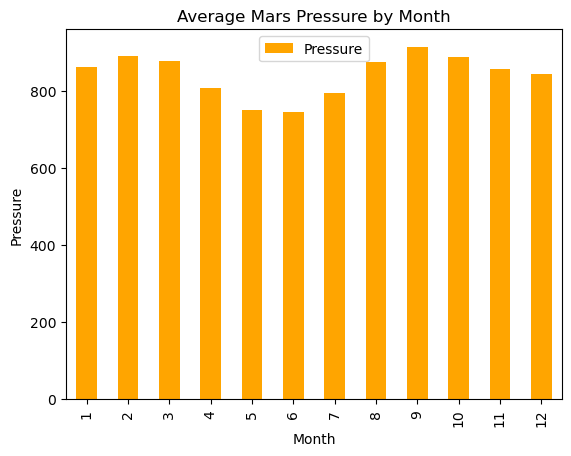

In [30]:
monthly_avg_pres_graph = monthly_avg_pres.plot(kind="bar", color="orange")

monthly_avg_pres_graph.set_title("Average Mars Pressure by Month")
monthly_avg_pres_graph.set_ylabel("Pressure")

plt.savefig('./avg_pressure_month_bar.png')

In [31]:
low_to_high_avg_pres = monthly_avg_pres.sort_values("Pressure")
low_to_high_avg_pres

,Pressure
Month,
6,745.05
5,748.56
7,795.11
4,806.33
12,842.16
11,857.01
1,862.49
8,873.83
3,877.32


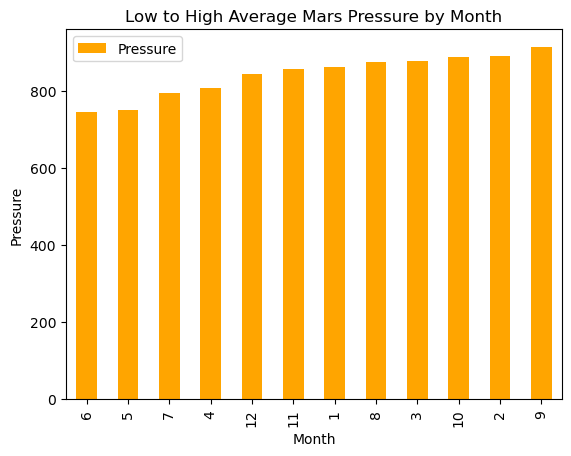

In [32]:
low_to_high_avg_pres_graph = low_to_high_avg_pres.plot(kind="bar", color="orange")

low_to_high_avg_pres_graph.set_title("Low to High Average Mars Pressure by Month")
low_to_high_avg_pres_graph.set_ylabel("Pressure")

plt.savefig('./low_high_pressure_avg.png')

## 5. About how many terrestrial (Earth) days exist in a Martian year? 


In [33]:
earth_days_martian_year = mars_data_df.groupby("Terrestrial Date").sum()
earth_days_martian_year

,Sol,ls,Month,Min Temp,Pressure
Terrestrial Date,,,,,
2012-08-16,10,155,6,-75.0,739.0
2012-08-17,11,156,6,-76.0,740.0
2012-08-18,12,156,6,-76.0,741.0
2012-08-19,13,157,6,-74.0,732.0
2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...
2018-02-23,1973,133,5,-78.0,730.0
2018-02-24,1974,134,5,-77.0,729.0
2018-02-25,1975,134,5,-76.0,729.0


In [34]:
earth_days_martian_year = earth_days_martian_year.loc[:, ['Min Temp']]
earth_days_martian_year

,Min Temp
Terrestrial Date,
2012-08-16,-75.0
2012-08-17,-76.0
2012-08-18,-76.0
2012-08-19,-74.0
2012-08-20,-74.0
...,...
2018-02-23,-78.0
2018-02-24,-77.0
2018-02-25,-76.0


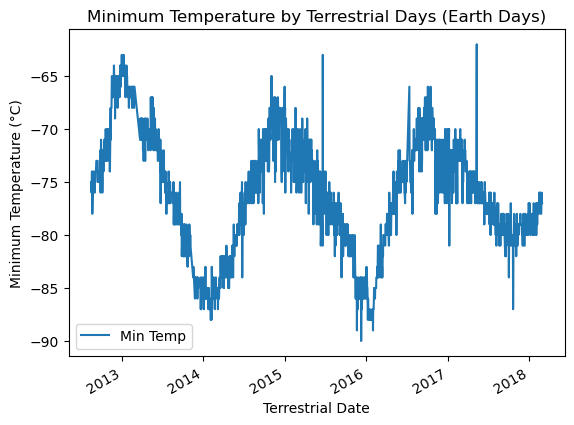

In [35]:
earth_days_martian_year_graph = earth_days_martian_year.plot(kind="line")

earth_days_martian_year_graph.set_title("Minimum Temperature by Terrestrial Days (Earth Days)")
earth_days_martian_year_graph.set_ylabel("Minimum Temperature (°C)")

# by estimating there is just under two earth years in one martian year... 
# around 675 - 690 earth days in a martian year. 

plt.savefig('./earth_days_martian_year.png')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [36]:
# Write the data to a CSV
mars_data_df.to_csv("./mars_data.csv")

In [37]:
browser.quit()